# PairGrid and pairplot
The difference with these plots (to the FacetGrid, factorplot, and lmplots) is that we only define the columns of data we want to compare.


In [1]:
#Importing packages
import io 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading csv
df=pd.read_csv("datasets//insurance_premiums.csv")
print(df.head())

        State  fatal_collisions  fatal_collisions_speeding  \
0     Alabama              18.8                         39   
1      Alaska              18.1                         41   
2     Arizona              18.6                         35   
3    Arkansas              22.4                         18   
4  California              12.0                         35   

   fatal_collisions_alc  fatal_collisions_not_distracted  \
0                    30                               96   
1                    25                               90   
2                    28                               84   
3                    26                               94   
4                    28                               91   

   fatal_collisions_no_hist  premiums  insurance_losses Region  
0                        80    784.55            145.08  South  
1                        94   1053.48            133.93   West  
2                        96    899.47            110.35   West  
3     

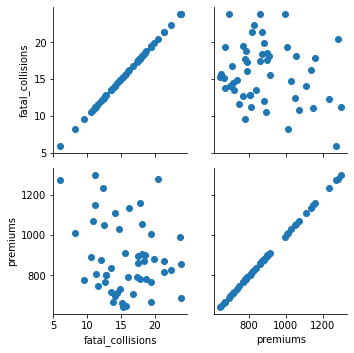

<Figure size 432x288 with 0 Axes>

In [3]:
#Compare "fatal_collisions" to "premiums" by using a scatter plot mapped to a PairGrid()
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map(plt.scatter)

plt.show()
plt.clf()

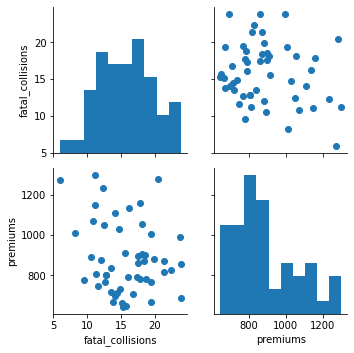

<Figure size 432x288 with 0 Axes>

In [4]:
#Create another PairGrid but plot a histogram on the diagonal and scatter plot on the off diagonal.
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)

plt.show()
plt.clf()

This analysis provides useful insight into the distribution of premium amounts as well as the limited relationships between fatal_collision and premiums

### Using a pairplot

The pairplot() function is generally a more convenient way to look at pairwise relationships. In this exercise, we will create the same results as the PairGrid using less code.

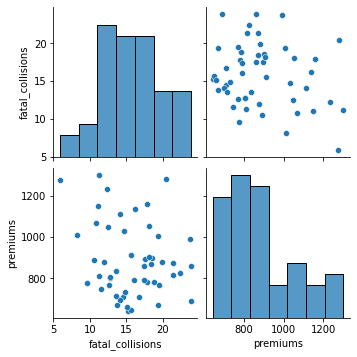

<Figure size 432x288 with 0 Axes>

In [5]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter')

plt.show()
plt.clf()

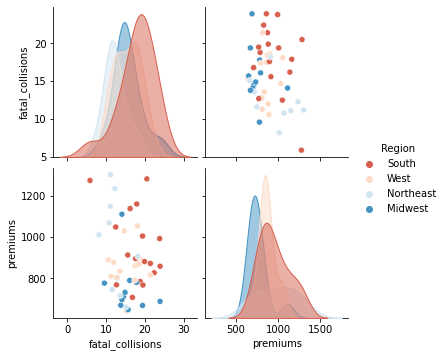

<Figure size 432x288 with 0 Axes>

In [6]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()
plt.clf()

The pairplot is generally a simpler than PairGrid for plotting complex relationships

### Additional pairplots

This exercise will go through a couple of more examples of how the pairplot() can be customized for quickly analyzing data and determining areas of interest that might be worthy of additional analysis.

One area of customization that is useful is to explicitly define the x_vars and y_vars that you wish to examine. Instead of examining all pairwise relationships, this capability allows you to look only at the specific interactions that may be of interest.

We have already looked at using kind to control the types of plots. We can also use diag_kind to control the types of plots shown on the diagonal

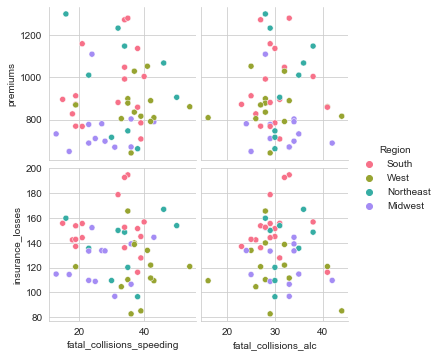

<Figure size 432x288 with 0 Axes>

In [12]:
#Create a pair plot that examines fatal_collisions_speeding and fatal_collisions_alc on the x axis and premiums and insurance_losses on the y axis.
#Use the husl palette and color code the scatter plot by Region.
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()
plt.clf()

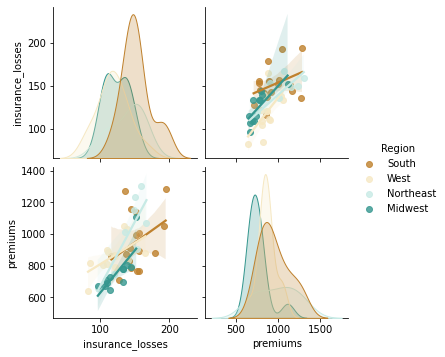

<Figure size 432x288 with 0 Axes>

In [8]:
#Build a pairplot() with kde plots along the diagonals. Include the insurance_losses and premiums as the variables.
#Use a reg plot for the the non-diagonal plots.
#Use the BrBG palette for the final plot.
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()


### JointGrid and jointplot

A JointGrid() allows us to compare the distribution of data between two variables. A JointGrid() makes use of scatter plots, regression lines, as well as histograms, distribution plots, and kernel density estimates to give us insight into our data.

Seaborn's JointGrid combines univariate plots such as histograms, rug plots and kde plots with bivariate plots such as scatter and regression plots.  These plots also demonstrate how Seaborn provides convenient functions to combine multiple plots together.


#### We will look at the relationship between humidity levels and total rentals to see if there is an interesting relationship we might want to explore later.

In [13]:
#Reading csv
data=pd.read_csv("datasets//bike_share.csv")
print(data.head())

       dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1        0        6           0           2   
1  2011-01-02       1   0     1        0        0           0           2   
2  2011-01-03       1   0     1        0        1           1           1   
3  2011-01-04       1   0     1        0        2           1           1   
4  2011-01-05       1   0     1        0        3           1           1   

       temp     atemp       hum  windspeed  casual  registered  total_rentals  
0  0.344167  0.363625  0.805833   0.160446     331         654            985  
1  0.363478  0.353739  0.696087   0.248539     131         670            801  
2  0.196364  0.189405  0.437273   0.248309     120        1229           1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454           1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518           1600  


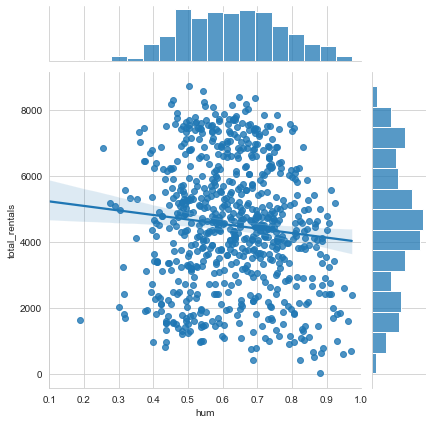

<Figure size 432x288 with 0 Axes>

In [17]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",
            y="total_rentals",
            data=data,
            xlim=(0.1, 1.0)) 

g.plot(sns.regplot, sns.histplot)

plt.show()
plt.clf()

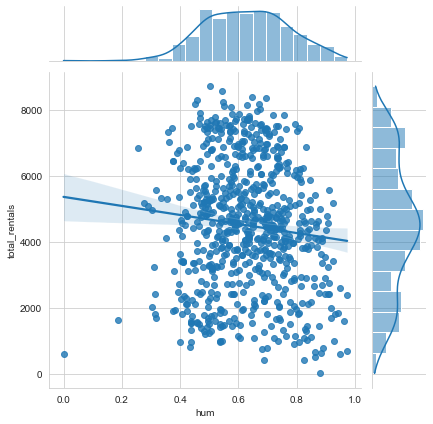

<Figure size 432x288 with 0 Axes>

In [18]:
# Create a jointplot similar to the JointGrid 
sns.jointplot(x="hum",
        y="total_rentals",
        kind='reg',
        data=data)

plt.show()
plt.clf()

These plots show that there is limited relationship between rental amounts and humidity level

### Jointplots and regression
Since the previous plot does not show a relationship between humidity and rental amounts, we can look at another variable that we reviewed earlier. Specifically, the relationship between temp and total_rentals

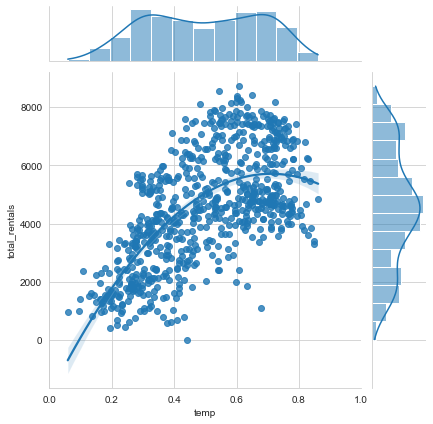

<Figure size 432x288 with 0 Axes>

In [20]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
              y="total_rentals",
              kind='reg',
              data=data,
              order=2,
              xlim=(0, 1))

plt.show()
plt.clf()

Use a residual plot to check the appropriateness of the model.

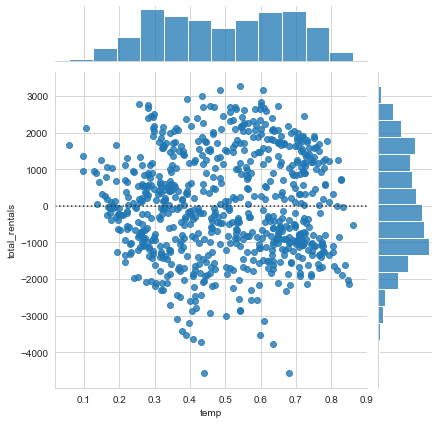

<Figure size 432x288 with 0 Axes>

In [22]:
# Plot a jointplot showing the residuals
sns.jointplot(x="temp",
        y="total_rentals",
        kind='resid',
        data=data,
        order=2)

plt.show()
plt.clf()

Based on the residual plot and the pearson r value, there is a positive relationship between temperature and total_rentals.

### Complex jointplots
The jointplot is a convenience wrapper around many of the JointGrid functions. However, it is possible to overlay some of the JointGrid plots on top of the standard jointplot. In this example, we can look at the different distributions for riders that are considered casual versus those that are registered

C:\Users\Yira\Anaconda\lib\site-packages\seaborn\axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


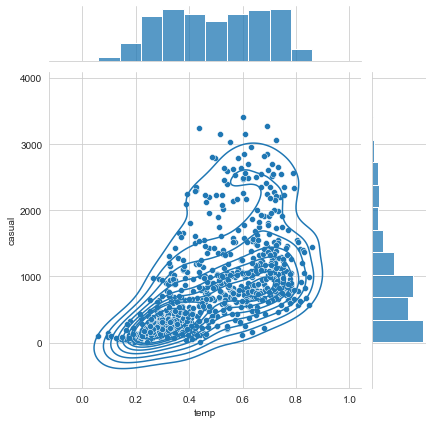

<Figure size 432x288 with 0 Axes>

In [24]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x="temp",
             y="casual",
             kind='scatter',
             data=data,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))
    
plt.show()
plt.clf()

C:\Users\Yira\Anaconda\lib\site-packages\seaborn\axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


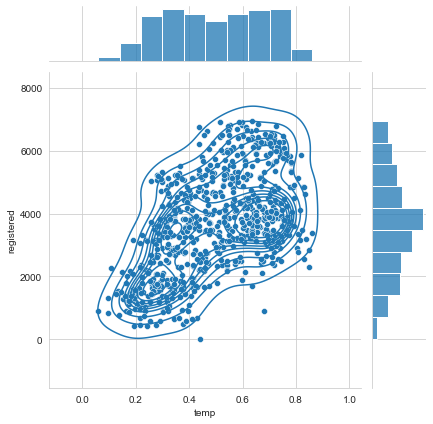

<Figure size 432x288 with 0 Axes>

In [26]:
# Replicate the previous plot but only for registered riders
g = (sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=data,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))

plt.show()
plt.clf()